In [137]:
import numpy as np
import matplotlib.pyplot as plt

lattice size = L * L

but the size of the lattice must be (L+2) * (L+2)

and the index    

j -> 1:L+1

i -> 1:L+1



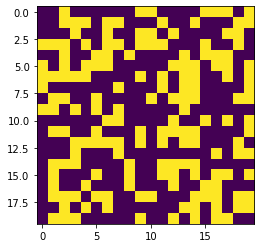

In [138]:
L = 20
lattice = np.zeros((L+2,L+2))

lattice[:,0]=1
lattice[0,:]=-2
lattice[-1]=-2
plt.imshow(lattice)
lattice

p=0.4
for j in range(1,L+1):
    for i in range(1,L+1):
        rand = np.random.random()
        if rand<p :
            lattice[i,j]=1

        
plt.imshow(lattice[1:L+1,1:L+1])
lattice


upper_range=1000
cluster = [0 for i in range(upper_range)]
color = [i for i in range(0,upper_range)]
size = [0 for i in range(upper_range)]
cluster[0]=color[0]

color_matrix = -np.ones((L+2,L+2),dtype='int')
color_matrix[:,0]=color[0]


#plt.imshow(color_matrix)
color_matrix


color_counter=0
for i in range(1,L+1):
    for j in range(1,L+1):
        
        if lattice[i,j]==1:
             
            if lattice[i-1,j]==lattice[i,j-1]==1:
                if color_matrix[i-1,j]==color_matrix[i,j-1]:
                    color_matrix[i,j]=color_matrix[i,j-1]
                    size[color_matrix[i,j]]+=1
                else:
                    color_matrix[i,j]=color_matrix[i,j-1] 
                    size[color_matrix[i,j]]+=1
                    cluster[color_matrix[i-1,j]]=color_matrix[i,j]
                
            elif lattice[i-1,j]==1:
                color_matrix[i,j]=color_matrix[i-1,j]
                size[color_matrix[i,j]]+=1
                
            elif lattice[i,j-1]==1:
                color_matrix[i,j]=color_matrix[i,j-1]
                size[color_matrix[i,j]]+=1
                
            else:
                color_counter+=1
                color_matrix[i,j]=color[color_counter]
                cluster[color_matrix[i,j]]=color_matrix[i,j]
                size[color_matrix[i,j]]+=1
       
                
#lattice                


array([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1,  1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1,
         3,  3,  3, -1,  4, -1],
       [ 0, -1, -1,  1,  1,  1, -1,  5,  5, -1, -1, -1,  6, -1, -1,  7,
        -1, -1, -1,  8,  8, -1],
       [ 0, -1, -1, -1,  1, -1, -1,  5, -1, -1,  9,  9, -1, 10, -1, -1,
        -1, -1, 11, 11, -1, -1],
       [ 0,  0,  0,  0, -1, 12, -1,  5,  5, -1,  9,  9,  9, -1, -1, -1,
        13, -1, -1, 11, -1, -1],
       [ 0, -1, -1,  0, -1, -1, 14, 14, -1, 15, -1, -1, -1, -1, 16, -1,
        13, 13, 13, -1, -1, -1],
       [ 0,  0, -1,  0, -1, 17, 17, 17, -1, -1, -1, -1, -1, 18, 18, 18,
        -1, 13, 13, -1, 19, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1, -1, -1, 20, -1, 21, -1, 18, 18,
        -1, -1, 13, -1, 19, -1],
       [ 0,  0, -1, -1, -1, -1, -1, -1, 22, -1, -1, -1, 21, -1, 18, 18,
        -1, -1, -1, -1, 19, -1],
       [ 0, -1, 23, 23, -1, -1, 24, -1, -1, -1, -1, 25,

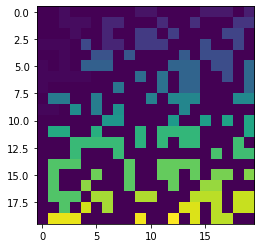

In [139]:
plt.imshow(color_matrix[1:L+1,1:L+1])
color_matrix

In [140]:
pre_color_matrix=np.zeros(color_matrix.shape)
while not (pre_color_matrix == color_matrix).all():
    pre_color_matrix= 1*color_matrix
    for i in range(L+1,-1,-1):
        for j in range(L+1,-1,-1):
            if color_matrix[i,j]!=-1:
                color_matrix[i,j]=color_of_cluster(cluster[color_matrix[i,j]],cluster)
          




array([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1,  1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1,
         3,  3,  3, -1, 11, -1],
       [ 0, -1, -1,  1,  1,  1, -1,  0,  0, -1, -1, -1,  6, -1, -1,  7,
        -1, -1, -1, 11, 11, -1],
       [ 0, -1, -1, -1,  1, -1, -1,  0, -1, -1,  9,  9, -1, 10, -1, -1,
        -1, -1, 11, 11, -1, -1],
       [ 0,  0,  0,  0, -1, 12, -1,  0,  0, -1,  9,  9,  9, -1, -1, -1,
        13, -1, -1, 11, -1, -1],
       [ 0, -1, -1,  0, -1, -1,  0,  0, -1, 15, -1, -1, -1, -1, 26, -1,
        13, 13, 13, -1, -1, -1],
       [ 0,  0, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, 26, 26, 26,
        -1, 13, 13, -1, 27, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1, -1, -1, 20, -1, 21, -1, 26, 26,
        -1, -1, 13, -1, 27, -1],
       [ 0,  0, -1, -1, -1, -1, -1, -1, 22, -1, -1, -1, 21, -1, 26, 26,
        -1, -1, -1, -1, 27, -1],
       [ 0, -1,  0,  0, -1, -1, 24, -1, -1, -1, -1, 25,

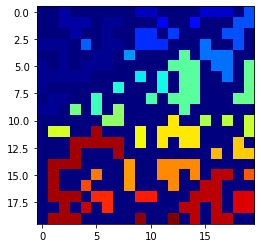

In [141]:
plt.imshow(color_matrix[1:L+1,1:L+1], cmap=plt.get_cmap('jet'))
#plt.imshow(color_matrix[1:L+1,1:L+1])
color_matrix

In [142]:
def color_of_cluster44(cluster_number, cluster):
    if cluster[cluster_number] == cluster_number:
        #print('here is the answer:{}'.format(cluster_number))
        return cluster_number
    else:
        #print(cluster[cluster_number])
        a = color_of_cluster(cluster[cluster_number],cluster)
        return a
    

# Numeric analysis
perivous sections was somehow for visualization.
but for our simulatoin we want something more than a few colorful plots.

to make a numeric analysis we need to make the code more clear and systematic

In [186]:
def Run_Experiment(L,p):
    L = L
    lattice = np.zeros((L+2,L+2))

    lattice[:,0]=1
    lattice[0,:]=-2
    lattice[-1]=-2
    #plt.imshow(lattice)
    lattice

    p=p
    for j in range(1,L+1):
        for i in range(1,L+1):
            rand = np.random.random()
            if rand<p :
                lattice[i,j]=1


    #plt.imshow(lattice[1:L+1,1:L+1])
    lattice


    upper_range=100000
    cluster = [-12 for i in range(upper_range)]
    color = [i for i in range(0,upper_range)]
    size = [0 for i in range(upper_range)]
    cluster[0]=color[0]

    color_matrix = -np.ones((L+2,L+2),dtype='int')
    color_matrix[:,0]=color[0]


    #plt.imshow(color_matrix)
    color_matrix


    color_counter=0
    for j in range(1,L+1):
        for i in range(1,L+1):

            if lattice[i,j]==1:

                if lattice[i-1,j]==lattice[i,j-1]==1:
                    if color_matrix[i-1,j]==color_matrix[i,j-1]:
                        color_matrix[i,j]=cluster[color_matrix[i,j-1]]
                        cluster[color_matrix[i,j]]=color_matrix[i-1,j]
                        size[color_matrix[i,j]]+=1
                    else:
                        color_matrix[i,j]=cluster[color_matrix[i,j-1]] 
                        cluster[color_matrix[i,j]]= cluster[color_matrix[i,j-1]]
                        cluster[color_matrix[i-1,j]]=cluster[color_matrix[i,j]]
                        color_matrix[i-1,j]=cluster[color_matrix[i,j]]
                        size[color_matrix[i,j]]+=1
                        #color[color_matrix[i-1,j]]=color[color_matrix[i,j]]

                elif lattice[i-1,j]==1:
                    cluster[color_matrix[i,j]]=cluster[color_matrix[i-1,j]]
                    color_matrix[i,j]=cluster[color_matrix[i-1,j]]
                    size[color_matrix[i,j]]+=1

                elif lattice[i,j-1]==1:
                    cluster[color_matrix[i,j]]=cluster[color_matrix[i,j-1]]
                    color_matrix[i,j]=cluster[color_matrix[i,j-1]]
                    size[color_matrix[i,j]]+=1

                else:
                    color_counter+=1
                    color_matrix[i,j]=color[color_counter]
                    cluster[color_matrix[i,j]]=color_matrix[i,j]
                    size[color_matrix[i,j]]+=1
            #print(color_matrix)
            #print('-------------------------------------------//n------------------------------------------')
    
    Cluster = ['NAN' for i in range(100000)]
    i=0
    #'''
    while cluster[i] != -12:
        Cluster[color[i]]=color_of_cluster(cluster[i],cluster)
        #size[color[i]]=
        #print(color[i], color_of_cluster(cluster[i],cluster))
        i+=1
        
    for i in range(1,L+1):
        for j in range(1,L+1):
            if color_matrix[i,j] != -1:
                color_matrix[i,j] = Cluster[color_matrix[i,j]]
    #'''
    
    i=0
    Size = [0 for i in range(len(size))]
    while cluster[i]!=-12:
        Size[Cluster[i]]+=size[i]

        i+=1
    return color_matrix, lattice,cluster, Size ,color            

    

In [144]:
def percolation_check(cluster, color_matrix):
    flag= 0
    for i in range(int(color_matrix.shape[1])):
        if color_matrix[i,-2] != -1:  
            if color_of_cluster(color_matrix[i,-2],cluster) == color_of_cluster(0,cluster):
                flag =1

    return flag

In [145]:
def Run_full_Experiment(L,p):
    color_matrix, lattice,cluster, size, color= Run_Experiment(L,p)

    plt.imshow(color_matrix[1:L+1,1:L+1])
    #print(color_matrix.shape[1])
    return percolation_check(cluster, color_matrix)

In [146]:
def color_of_cluster(a, cluster):
    counter=0
    while cluster[a] != a:
        counter+=1
        #print(cluster[a], a)
        a = cluster[a]
        if counter==1000:
            #print('hoho')
            break
    return a

In [219]:
def cluster_number(color_matrix):
    a = color_matrix[:,1]
    b = color_matrix[:,-2]
    aa = a[a==b]
    aaa = aa != -1
    print(aa[aaa])
    return aa[aaa][0]

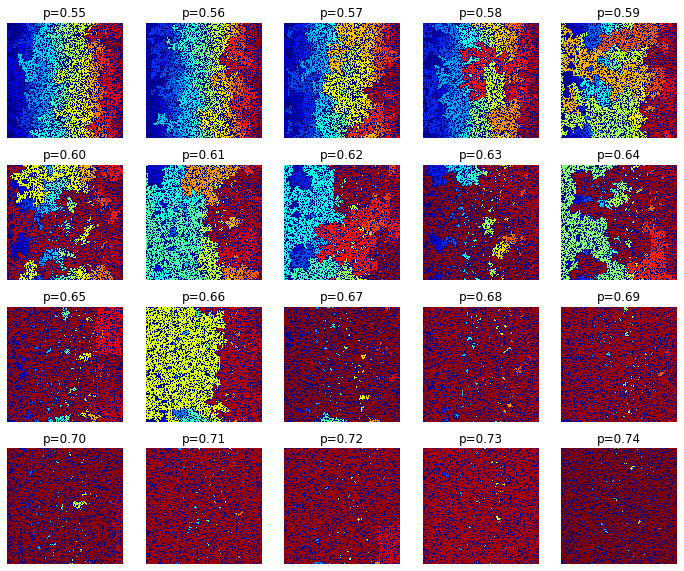

In [151]:
L=150
p=0.57
p_list = np.arange(0.55,0.75,0.01)
fig = plt.figure(figsize=(12,10))
#color_matrix, lattice,cluster, size, color= Run_Experiment(L,p)
#plt.imshow(color_matrix[1:L+1,1:L+1], cmap = plt.get_cmap('jet'))
i=0
for p in p_list:
    #print(p)
    ax = fig.add_subplot(4,5,i+1,title='p=%3.2f'%p)
    i+=1
    color_matrix, lattice,cluster, size, color= Run_Experiment(L,p)

    ax.imshow(color_matrix[1:L+1,1:L+1], cmap = plt.get_cmap('jet'))
    ax.axis('off')

KeyboardInterrupt: 

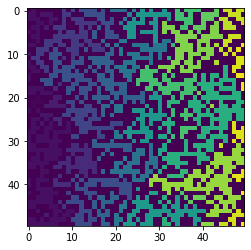

In [152]:
Q = 20
L=50
data=[]
p_list = np.arange(0.5,0.7,0.01)
for p in p_list:
    state=0
    for experiment in range(Q):
        state += Run_full_Experiment(L,p)
    state/=Q
    data.append((p, state))

NameError: name 'distance' is not defined

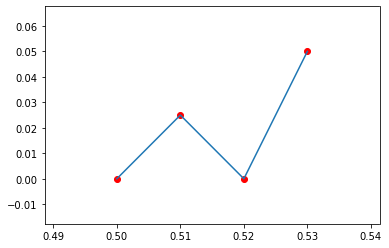

In [156]:
data = np.array(data)
plt.scatter(data[:,0], data[:,1], c='red', label='L={}\nQ={}\n'.format(L,Q))
plt.plot(data[:,0],data[:,1])
distance.append((L,data[data[:,1]<0.9][-1][0] - data[data[:,1]>0.1][0][0]))
plt.legend()

In [1483]:
distance

[(100, 0.06000000000000005),
 (120, 0.07000000000000006),
 (140, 0.07000000000000006),
 (160, 0.06000000000000005),
 (180, 0.08000000000000007),
 (300, 0.09000000000000008),
 (50, 0.1100000000000001),
 (50, 0.07000000000000006)]

In [1456]:
data[data[:,1]>.1]

array([[0.61, 0.22],
       [0.62, 0.3 ],
       [0.63, 0.44],
       [0.64, 0.59],
       [0.65, 0.64],
       [0.66, 0.78],
       [0.67, 0.85],
       [0.68, 0.89],
       [0.69, 0.95],
       [0.7 , 0.96],
       [0.71, 0.93],
       [0.72, 0.98],
       [0.73, 0.99],
       [0.74, 0.99]])

# The probality of being in infinite cluster

In [223]:
p_list = np.arange(0.57,0.7,0.01)
Q=50
L=100
cluster_size_data = []
for p in p_list:
    s=0
    for q in range(Q):
        color_matrix, lattice,cluster, size, color= Run_Experiment(L,p)
        if percolation_check(cluster,color_matrix) ==1:
            inf_cluster_color = cluster_number(color_matrix)
            select = (np.random.randint(1,L+1),np.random.randint(1,L+1))
            if color_matrix[select] != -1 :
                if color_matrix[select] != inf_cluster_color:
                    s+=size[color_matrix[select]]**0.5
        else:
            select = (np.random.randint(1,L+1),np.random.randint(1,L+1))
            s+=size[color_matrix[select]]**0.5
                      
    cluster_size_data.append((p,s/Q))

[918]
[941 941 941 941 941 941]
[944 944 944 944 944 944]
[905 905 905]
[958 958 958 958]
[921 921 921]
[854 854 854 854 854 854]
[918 918 918 918 918 918 918 918 918 918 918]
[974 974 974 974 974 974 974 974 974 974 974 974]
[894 894 894 894 894 894 894 894 894 894 894 894 894 894 894 894 894 894
 894 894 894 894 894 894]
[894 894 894 894 894 894 894 894 894 894]
[937 937 937 937 937]
[904 904 904 904 904 904 904]
[808 808 808]
[892 892]
[851 851 851 851 851 851 851 851 851 851]
[856 856 856 856 856 856 856 856 856 856 856 856 856 856 856 856]
[847 847 847 847 847 847 847 847]
[866 866 866 866 866]
[846 846 846 846 846 846 846 846 846]
[837 837 837]
[886 886 886 886 886 886 886 886 886]
[912 912 912 912 912 912 912 912]
[816 816 816 816]
[756 756 756]
[864 864 864 864 864 864 864 864 864 864 864 864 864 864 864 864 864]
[831 831 831 831 831 831 831 831 831 831]
[826 826 826 826 826 826 826 826 826]
[890 890 890 890 890 890 890]
[835 835 835 835 835 835 835 835 835 835 835 835 835 835 

[743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743 743]
[713 713 713 713 713 713 713 713 713 713 713 713 713 713 713 713 713 713
 713 713 713 713 713]
[669 669 669 669 669 669 669 669 669 669 669 669 669 669 669 669 669 669
 669 669]
[704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704
 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704 704
 704 704]
[709 709 709 709 709]
[735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735
 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735 735
 735 735 735 735 735 735 735 735 735]
[701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701
 701 701 701 701 701 701 701 701]
[701 701 701 701 701 701 701 701 701 701 701 701 701 701]
[797 797 797 797 797 797 797 797 797 797 797 797 797 797 797 797 797 797
 797 797 797 797 797 797 797 797 797 797 797]
[702 702 702 702 702 702]
[709 709 709 709 709 709 709 709 709 709 709 709 709]
[769 769 769 769 769 7

[701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701
 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701 701
 701 701 701 701 701]
[687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687
 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687 687
 687 687 687 687 687 687 687 687 687 687]
[663 663 663 663 663 663]
[670 670 670 670 670 670 670 670 670 670 670 670 670 670 670]
[674 674 674 674 674 674 674 674 674 674 674 674 674 674 674 674 674 674
 674 674 674 674 674 674 674 674 674 674 674 674]
[644 644 644 644 644 644 644 644 644 644 644 644]
[725 725 725 725 725 725 725 725 725 725 725 725 725 725 725 725 725 725
 725 725 725 725 725]
[722 722 722 722 722 722 722 722 722 722 722 722 722 722 722 722 722 722
 722 722 722 722 722 722 722 722 722 722]
[684 684 684 684 684 684 684 684 684 684 684 684 684 684 684 684 684]
[619 619 619 619 619 619 619 619 619 619 619 619 619 619 619 619 619 619
 619 619 619 619]
[641 641 641

[657 657 657 657 657 657 657 657 657 657 657 657 657 657 657 657 657 657
 657 657 657 657 657 657 657 657 657 657 657 657 657 657]
[645 645 645 645 645 645 645 645 645 645 645 645 645 645 645 645 645]
[647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647
 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647 647
 647 647 647 647 647 647 647 647 647]
[591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591
 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591
 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591 591
 591 591 591]
[634 634 634 634 634 634 634 634 634 634 634 634 634 634 634 634 634 634
 634 634 634 634 634 634 634 634 634 634 634 634 634 634 634 634]
[644 644 644 644 644 644 644 644 644 644 644 644]
[643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643
 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643 643
 643 643 643 643]
[665 665 665 665 665 665 665 

Text(0, 0.5, 'average size of non infinite cluster')

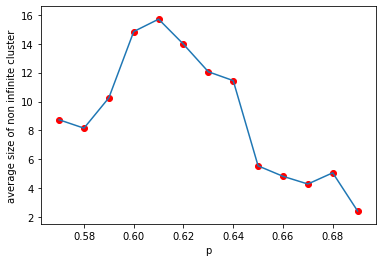

In [225]:
cluster_size_data = np.array(cluster_size_data)
plt.plot(cluster_size_data[:,0], cluster_size_data[:,1])
plt.scatter(cluster_size_data[:,0], cluster_size_data[:,1],c= 'red')
plt.xlabel('p')
plt.ylabel('average size of non infinite cluster')


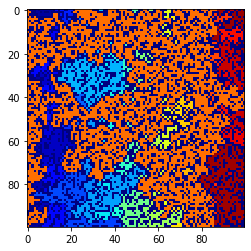

In [132]:
p=0.61
L=100
color_matrix, lattice,cluster, size, color= Run_Experiment(L,p)
plt.imshow(color_matrix[1:L+1,1:L+1], cmap=plt.get_cmap('jet'))

In [133]:
percolation_check(cluster,color_matrix)

1

In [134]:
cluster_number(color_matrix)

778

In [135]:
np.random.randint(1,L+1)

95

In [136]:
size

[188,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 53,
 47,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 99,
 6,
 7,
 2,
 1,
 14,
 1,
 22,
 1,
 2,
 1,
 1,
 2,
 3,
 6,
 1,
 1,
 8,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 3,
 1,
 1,
 3,
 4,
 56,
 1,
 84,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 17,
 2,
 3,
 6,
 23,
 7,
 1,
 2,
 19,
 3,
 1,
 1,
 2,
 4,
 10,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 50,
 1,
 3,
 2,
 2,
 1,
 6,
 28,
 3,
 6,
 1,
 1,
 25,
 2,
 3,
 1,
 1,
 60,
 2,
 1,
 1,
 13,
 1,
 7,
 2,
 1,
 5,
 4,
 3,
 1,
 1,
 3,
 18,
 1,
 1,
 8,
 13,
 1,
 1,
 3,
 23,
 1,
 18,
 1,
 2,
 7,
 1,
 2,
 18,
 2,
 1,
 1,
 1,
 12,
 1,
 1,
 3,
 1,
 10,
 2,
 2,
 5,
 2,
 3,
 4,
 1,
 1,
 1,
 71,
 3,
 1,
 3,
 3,
 5,
 10,
 1,
 1,
 1,
 2,
 1,
 2,
 23,
 1,
 1,
 2,
 12,
 7,
 13,
 4,
 1,
 47,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 33,
 1,
 2,
 2,
 1,
 3,
 5,
 10,
 1,
 2,
 1,
 1,
 19,
 5,
 7,
 32,
 1,
 1,
 1,
 1,
 1,
 58,
 2,
 8,
 2,
 11,
 5,
 4,
 2,
 12,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 7,
 5,
 2,
 2,
 2,
 43,
 1,
 2,
 1,
 